<a href="https://colab.research.google.com/github/BLayus/Churn-Case/blob/main/Churn_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Retenção de Clientes**

Cada linha representa um cliente.

O conjunto de dados inclui informações sobre:
Clientes que saíram no último mês (Churn)

Serviços para os quais cada cliente se inscreveu:  telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivos, suporte técnico e streaming de TV e filmes

Informações da conta do cliente:  há quanto tempo eles são clientes, contrato, forma de pagamento, cobrança sem papel, cobranças mensais e cobranças totais

Informações demográficas sobre os clientes: sexo, faixa etária e se eles têm parceiros e dependentes


##**Importando Bibliotecas e Datasets**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import numpy as np

from datetime import datetime

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier)

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             classification_report,
                             roc_curve,
                             roc_auc_score,
                             precision_recall_curve,
                             auc,
                             f1_score,
                             plot_confusion_matrix,
                             precision_score,
                             recall_score,
                             precision_recall_fscore_support)

from sklearn.inspection import permutation_importance

from sklearn.tree import (DecisionTreeClassifier,
                          plot_tree,
                          export_graphviz)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Customer-Churn.csv', index_col=0)

Mounted at /content/drive


In [ ]:
# Primeira visualização do dataset
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Inspecionando nomes de colunas, contagem de nulos e d-types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
# Avaliando medidas de tendência estatística 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
 # São 7043 linhas com 20 colunas, nenhum registro nulo, várias colunas com informações categóricas que precisam ser tratadas
 # Não há aparentemente nenhum outlier

##**Tratamento dos Dados**

###Dados com dois valores

In [ ]:
# Loop entre as colunas para visualizar os unique values de cada uma

for i in df.columns:
  print(f"Unique values for {i}: {df[i].nunique()}\n")
  print(f"Is there any null value? {df[i].isna().sum()}\n")
  print(f"These are the values: {df[i].unique()}\n")
  


Unique values for gender: 2

Is there any null value? 0

These are the values: ['Female' 'Male']

Unique values for SeniorCitizen: 2

Is there any null value? 0

These are the values: [0 1]

Unique values for Partner: 2

Is there any null value? 0

These are the values: ['Yes' 'No']

Unique values for Dependents: 2

Is there any null value? 0

These are the values: ['No' 'Yes']

Unique values for tenure: 73

Is there any null value? 0

These are the values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique values for PhoneService: 2

Is there any null value? 0

These are the values: ['No' 'Yes']

Unique values for MultipleLines: 3

Is there any null value? 0

These are the values: ['No phone service' 'No' 'Yes']

Unique values for InternetService: 3

Is there any null value? 0

These are the values: ['DSL' 

In [ ]:
# Substituindo valores de colunas categóricas com dois valores diferentes, ex: sim e não
# Inclusive a coluna Churn, que será nosso target

for i in df.columns:
  if len(df[i].unique()) == 2:
    x = (df[i].unique())
    df[i].replace(x[0], 0, inplace=True)
    df[i].replace(x[1], 1, inplace=True)


###Dados com mais do que dois Valores

In [ ]:
# São dados categóricos e não ordinais (não importa a ordem, nao há hierarquia) com mais do que dois valores
# Para transformá-los em dados numéricos, vou usar a técnica de dumificação ou one-hot-encoding

feat_dummy = ['MultipleLines',	'InternetService', 'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',
              'TechSupport',	'StreamingTV',	'StreamingMovies',	'Contract',	'PaymentMethod']

df = pd.get_dummies(df, columns=feat_dummy)              


In [ ]:
# Convertendo a coluna Total Charges para numérica
# desta forma, os valores não  numéricos são preenchidos com NAN, not-a-number
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

df['Churn'] = pd.to_numeric(df['Churn'], errors = 'coerce')

In [ ]:
# Convertendo as demais colunas faltantes para numéricas
#Transformando todos os dtypes para numéricos

for i in df.columns:
   df[i].convert_dtypes()
   
# convert dtypes, converte para o melhor tipo de dtype

In [ ]:
# Verificando os dtypes após a conversão
# Todas as features foram transformadas em numéricas, com exceção da coluna Churn, nosso alvo

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_No                      

In [ ]:
# Verificando se há algum missing values
#Existem apenas 11 valores nulos na coluna Total Charges

df.isna().sum()

gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No                             0
OnlineBackup_No internet service            0
OnlineBackup_Yes                  

In [ ]:
# São aprox 7500 linhas de dados, se deletar as 11 linhas com dados nulos, não fará diferença substancial nas posteriores etapas

df['TotalCharges'] = df['TotalCharges'].dropna()

In [ ]:
# Vou dropar de todo o dataframe, para evitar erro na execução dos modelos

df = df.dropna()

In [ ]:
# Verificando dataset para avaliar as alterações

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,0,0,1,0,0,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
5575-GNVDE,1,0,1,0,34,1,1,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
3668-QPYBK,1,0,1,0,2,1,0,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
7795-CFOCW,1,0,1,0,45,0,1,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
9237-HQITU,0,0,1,0,2,1,0,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


###Normalização dos Dados

In [ ]:
# As colunas numericas originais possuem valores ordinais muito distantes do restante dos dados que estão binarizados
# Por isso pode ser importante aplicar uma normalização a estas colunas
# O Min Max scaler irá pegar o menor e o maior valor da coluna e atribuir 0 e 1, respectivamente
# Os demais dados irão variar dentro deste range
# O standard scaler irá atribuir 0 à média dos valores da coluna e irá variar entre -1 e 1
# Neste caso não temos dados negativos e o ideal é usar o algoritmo Min-Max Scaler (col - col.min() / (col.max() - col.min())

mm_feat = ['tenure', 'MonthlyCharges',	'TotalCharges']

for i in mm_feat:
  df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
# Todos os dados estão binarizados e normalizados, variando entre 0 e 1
# Com exceção da coluna alvo Churn

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,0,0,0.000000,0,0,0.115423,0.001275,0,...,1,0,0,1,0,0,0,0,1,0
5575-GNVDE,1,0,1,0,0.464789,1,1,0.385075,0.215867,0,...,1,0,0,0,1,0,0,0,0,1
3668-QPYBK,1,0,1,0,0.014085,1,0,0.354229,0.010310,1,...,1,0,0,1,0,0,0,0,0,1
7795-CFOCW,1,0,1,0,0.619718,0,1,0.239303,0.210241,0,...,1,0,0,0,1,0,1,0,0,0
9237-HQITU,0,0,1,0,0.014085,1,0,0.521891,0.015330,1,...,1,0,0,1,0,0,0,0,1,0


##**Análise Exploratória dos Dados - EDA**

  * O objetivo desta análise é avaliar quais características levam o cliente a desistir de continuar com o serviço (Churn)

  * Também será importante para avaliar a presença de dados inconsistentes, outliers e entender quais features são mais importantes para o modelo de predição.

In [ ]:
# Aplicando um plot style para os gráficos

plt.style.use('seaborn')

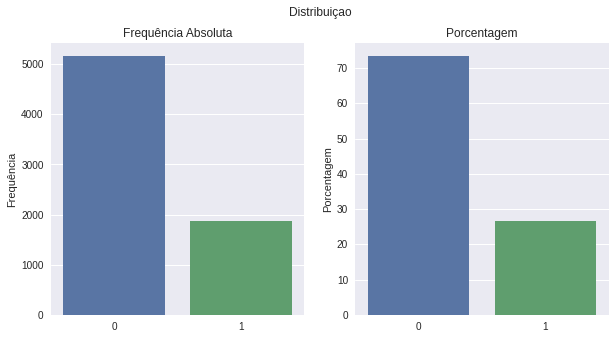

Churn  Frequência  Porcentagem
0            5163    73.421502
1            1869    26.578498


In [ ]:
# Avaliando distribuição absoluta e percentual dos casos de churn

dist_abs = df['Churn'].value_counts()
dist_percent = df['Churn'].value_counts(normalize=True) * 100

freq = pd.DataFrame({'Frequência':dist_abs, 'Porcentagem': dist_percent})
freq.rename_axis('Churn', axis='columns', inplace=True)

fig, axes = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Distribuiçao')
axes[0].set_title('Frequência Absoluta')
axes[1].set_title('Porcentagem')
sns.barplot(x=freq.index, y=freq['Frequência'], ax=axes[0])
sns.barplot(x=freq.index, y=freq['Porcentagem'], ax=axes[1])

plt.show()
print(freq)


In [ ]:
# A Amostra está desbalanceada, há quase 3 vezes mais casos de No Churn do que casos de Churn, isto pode afetar a performance do modelo

####Leitura dos Boxplots

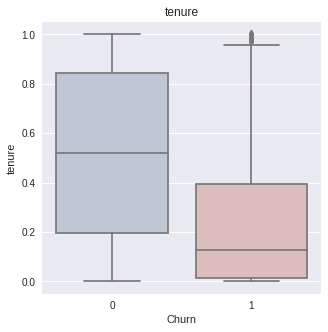

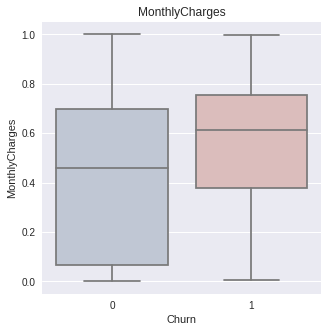

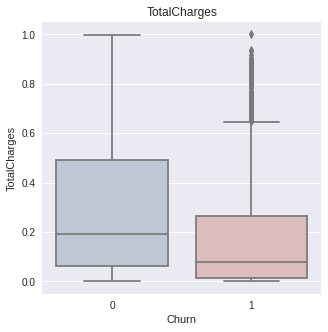

In [ ]:
# Imprimindo boxplots para avaliar as variáveis numéricas

num_var = ['tenure', 'MonthlyCharges', 'TotalCharges']

for i in num_var:
  fig, axes = plt.subplots(1,1, figsize=(5,5))
  ax = sns.boxplot(x='Churn', y=i, data=df, palette='vlag')
  ax.set_title(i)
  plt.show()


  * **IMPORTANTE** - como os boxplots foram plotados sobre o dataframe já normalizado, não conseguiremos avaliar as quantidades absolutas. Para realizar a leitura destes boxplots, será necessário abstrair os valores absolutos e concentrar esforços no entendimento das relações proporcionais.

  * Tenure - Clientes que abandonam contratos possuem valores médios de tempo de contrato bem baixos (a mediana dos clientes Churn fica abaixo do segundo quartil dos clientes No Churn

  * Monthly Charges - Clientes churn pagam valores mensais maiores do que clientes no churn (mediana dos clientes churn é apenas um pouco menor do que o terceiro quartil dos clientes no churn).
  O intervalo interquartis dos clientes churn também é bem menor do que os no churn

  * Total Charges - Apenas confirma que clientes churn abandonam o serviço mais rápido e portanto possuem valores de gasto total menores.
  Neste boxplot há muitos valores esparsos acima do terceiro quartil, o que indica aqueles clientes churn que mesmo com longa permanência abandonam o serviço.

####Leitura dos Countplots Comparativos

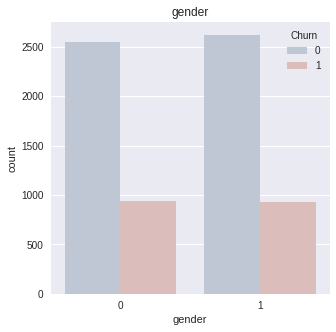

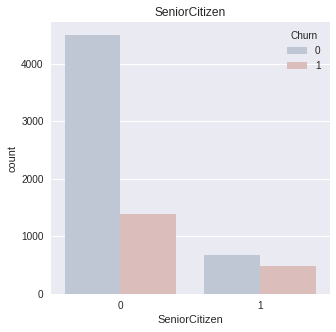

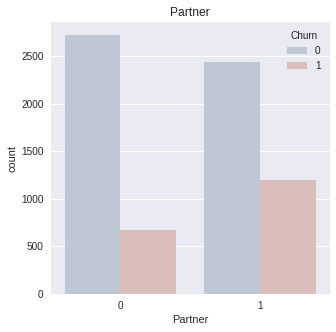

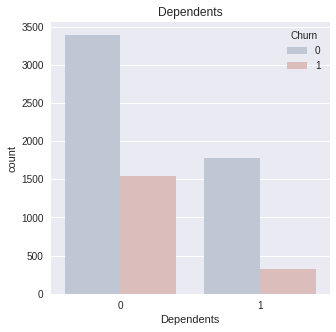

In [ ]:
# imprimindo gráficos com contagem de Churn X No churn por feature categórica

cat_var = ['gender', 'SeniorCitizen',	'Partner',	'Dependents']

for i in cat_var:
  fig, axes = plt.subplots(1,1, figsize=(5,5))
  ax = sns.countplot(x=i, hue='Churn', data=df, palette='vlag')
  ax.set_title(i)
  plt.show()
    

  * **Genre** - 0: Feminino, 1: Masculino
  * **Senior Citizen** - 0: Não, 1: Sim
  * **Partner** - 0: Sim, 1: Não
  * **Dependents** - 0: Não, 1: Sim
  
  * Clientes churn e no churn se distribuem de forma bem semelhante de acordo com o gênero

  * Clientes idosos (senior citizens) tendem a ter uma proporção maior de churn em relação ao total da amostra do que clientes mais jovens

  * Clientes que não possuem parceiro e não possuem dependentes (pessoas que moram sozinhas, sem família) tendem a apresentar índices mais elevados de churn


  


###**Métodos de Detecção de Outliers**

In [ ]:
# Através do Método Interquartis IQR
# Não foram detectados outliers significativos através do método IQR

num_var = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num_var = pd.DataFrame(df[num_var])
df_num_var.describe()

Q1 = df_num_var.quantile(0.25)
Q3 = df_num_var.quantile(0.75)
IQR = Q3 - Q1
((df_num_var < (Q1 -1.5 * IQR)) | (df_num_var > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

In [ ]:
# Através do Método Estatístico (média e desvio padrão)

for i in num_var:

  outlier_mean = df[i].mean()
  outlier_std = df[i].std()

  no_outlier_dist = [outlier_mean - 2 * outlier_std, outlier_mean + 2 * outlier_std]
  outlier_dist = df[(df[i] < no_outlier_dist[0]) | (df[i] > no_outlier_dist[1])].values

  print(f" A Coluna {i} possui : {outlier_dist.sum()} outliers")


 A Coluna tenure possui : 0.0 outliers
 A Coluna MonthlyCharges possui : 0.0 outliers
 A Coluna TotalCharges possui : 6060.721385757136 outliers


##**Definindo Funções e Pipeline**

In [ ]:
# Criar uma função para definir o alvo

def set_target(df, target):
  print('Definindo Target')
  x = df.drop(target, axis=1)
  y = df[target]
  return x, y

In [ ]:
# Criando uma função para dividir a base em treino e teste

def get_train_test(x, y, test_size_p):
  print('Dividindo a base de Treino e Teste')
  x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = test_size_p,
                                                    stratify=y, random_state=42)
  return x_train, x_test, y_train, y_test

In [ ]:
# Definindo uma função para aplicar o modelo

def model_apply(model, x_train, x_test, y_train):
  print('Aplicando o Modelo')
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  return y_pred

In [ ]:
# Definindo uma função para avaliar o resultado do modelo

def evaluate_model(y_test, y_pred, model):
  print('Avaliando o Resultado')
  accuracy = accuracy_score(y_test, y_pred) * 100
  print(f" Acurácia da Amostra de Teste: {accuracy}\n")
  print(f" Score Amostra de Treino (comparativo): {model.score(x_train, y_train)}\n")
  print(classification_report(y_test, y_pred))
  
  #cmf = confusion_matrix(yReal, yHat)
  #sns.heatmap(pd.DataFrame(cmf), annot=True, fmt= 'g', cmap= 'YlOrBr')
  fig, axes = plt.subplots(1,2, figsize=(17,8)) 
  plot_confusion_matrix(model, x_test, y_test, display_labels=['No Churn', 'Churn'], cmap='YlOrBr' ,normalize=None, ax=axes[0])
  plot_confusion_matrix(model, x_test, y_test, display_labels=['No Churn', 'Churn'], cmap='YlOrBr',normalize='true', ax=axes[1])
  axes[0].set_title('Valores de Churn')
  axes[1].set_title('Percentual de Churn')
  axes[0].set_xlabel('P R E D I C T')
  axes[0].set_ylabel('R E A L')
  axes[1].set_xlabel('P R E D I C T')
  axes[1].set_ylabel('R E A L')
  plt.show()

  if type(model) == DecisionTreeClassifier:
    plt.figure(figsize=(25, 12))
    plot_tree(model, filled=True)
    plt.show()


In [ ]:
# Definindo uma função para avaliar a importância das features de um modelo de classificação

def feature_importance(df, model):
  feat_imp = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)

  top_feat = feat_imp[:6]
  all_feat = feat_imp[::]

  fig, axes = plt.subplots(1,2, figsize=(17,8))
  top_feat.plot(kind='bar', ax=axes[0])
  all_feat.plot(kind='bar', ax=axes[1])
  axes[0].set_title(f"{model} - Top 10 Most Important Features")
  axes[1].set_title(f"{model} - All Feature Importances")
  
  return print('')


In [ ]:
# Definindo uma função para plotar ROC Curve e AUC Score

def roc_curve_auc_score(x_test, y_test, model):

  y_hat_prob = model.predict_proba(x_test)[:,1]
  model_tfp, model_tvp, _= roc_curve(y_test, y_hat_prob)

  fig, axes = plt.subplots(1, figsize=(8,8))
  plt.plot([0,1], [0,1], 'r--')
  plt.plot(model_tfp, model_tvp, label='model')
  plt.xlabel('Taxa de Falso Positivo')
  plt.ylabel('Taxa de Verdadeiro Positivo')
  plt.title(f"{model} - Roc Curve")
  plt.show()

  return print(f"AUC Score (ROC): {roc_auc_score(y_test, y_hat_prob)}\n") 

In [ ]:
# Definindo uma função pipeline, juntando todas as anteriores em uma só

def pipeline(df, target, model, test_size_p):
  x, y = set_target(df,target)
  x_train, x_test, y_train, y_test = get_train_test(x, y, test_size_p)
  y_pred = model_apply(model, x_train, x_test, y_train)
  evaluate_model(y_test, y_pred, model)
  feature_importance(df, model)
  roc_curve_auc_score(x_test, y_test, model)


##**Aplicando Ao Modelo Dummy**

In [ ]:
# Chamar o modelo Dummy, que servirá de base para comparar a performance dos outros modelos

dummy = DummyClassifier()

In [ ]:
# Aplicar a função ao modelo dummy

x, y = set_target(df, 'Churn')
x_train, x_test, y_train, y_test = get_train_test(x, y, 0.3)
y_pred = model_apply(dummy, x_train, x_test, y_train)

Definindo Target
Dividindo a base de Treino e Teste
Aplicando o Modelo


Avaliando o Resultado
 Acurácia da Amostra de Teste: 73.41232227488152

 Score Amostra de Treino (comparativo): 0.7342543681430312

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

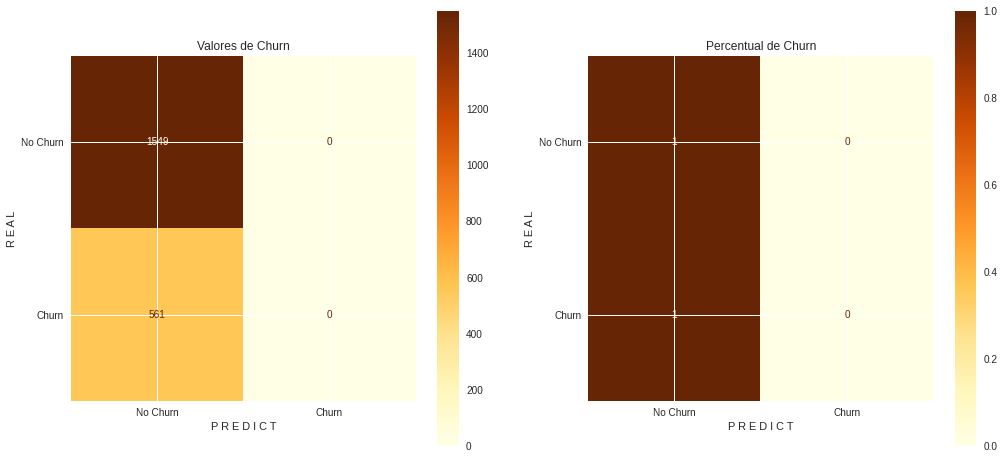

In [ ]:
# Aplicando a função evaluate ao modelo Dummy

evaluate_model(y_test, y_pred, dummy)

In [ ]:
# O modelo Dummy apresenta uma acurácia de 73.41%

##**Aplicando Pipeline ao Modelo Decision Tree**

In [ ]:
# Instanciando os modelos..

tree = DecisionTreeClassifier(max_depth=5)
r_forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()

Definindo Target
Dividindo a base de Treino e Teste
Aplicando o Modelo
Avaliando o Resultado
 Acurácia da Amostra de Teste: 78.81516587677724

 Score Amostra de Treino (comparativo): 0.8084112149532711

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.51      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


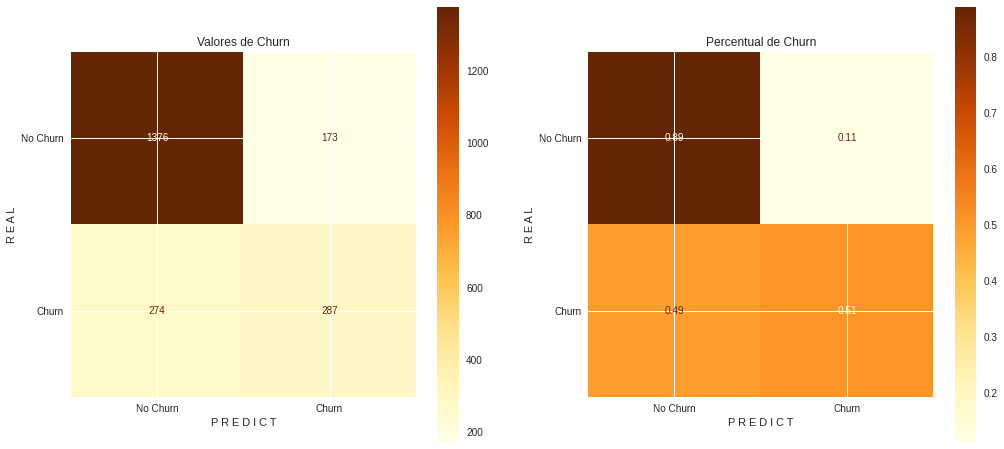

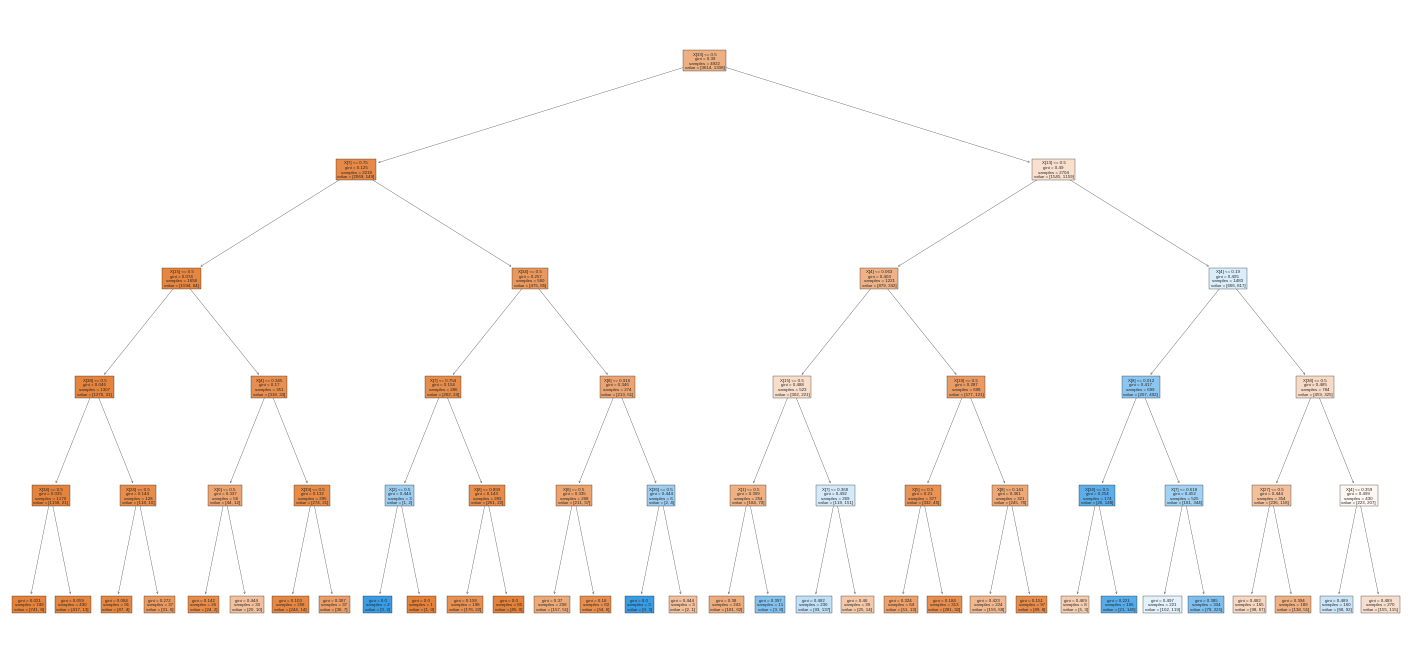

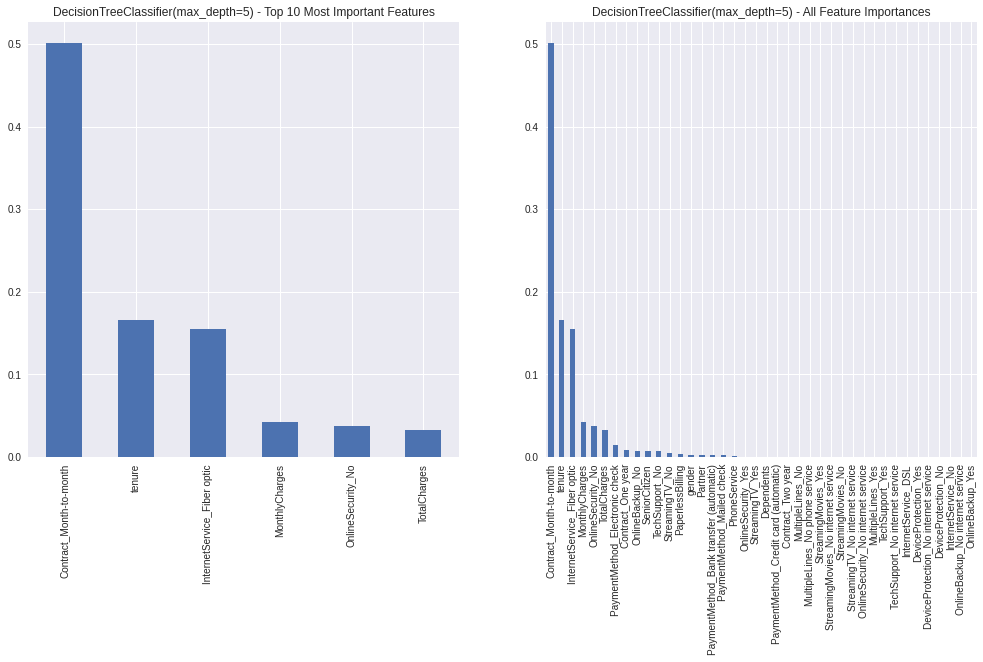

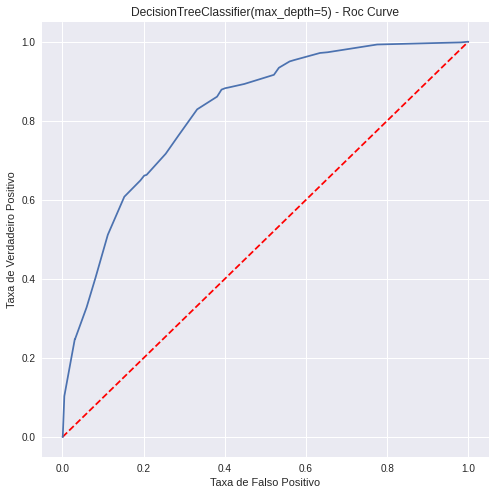

AUC Score (ROC): 0.8219620731677847



In [ ]:
# Aplicando pipeline ao modelo Tree

pipeline(df, 'Churn', tree, 0.3)

####Otimização do Modelo Tree com Uso do Grid Search CV

In [ ]:
# Otimizando o resultado através do uso de Grid Search CV

tree_parameter = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5, 6],
              'min_samples_leaf': [40, 50, 60, 70],
              'min_samples_split': [2, 5, 10, 15]             
              }

tree_grid = GridSearchCV(estimator=tree, param_grid=tree_parameter, cv=10, scoring='accuracy').fit(x_train, y_train)

print(f"Score Médio Treino: {tree_grid.score(x_train, y_train)}\n")
print(f"Score Médio Teste: {tree_grid.score(x_test, y_test)}\n")

print(f"O melhor parâmetro entre todos para estimar y_predict:\n{tree_grid.best_estimator_}\n")
print(f"O maior Score entre todos os parâmetros testados:\n{tree_grid.best_score_}\n")
print(f"A melhor combinação de parâmetros:\n{tree_grid.best_params_}\n")


Score Médio Treino: 0.8090207232832182

Score Médio Teste: 0.785781990521327

O melhor parâmetro entre todos para estimar y_predict:
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=60)

O maior Score entre todos os parâmetros testados:
0.7903333663154076

A melhor combinação de parâmetros:
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 60, 'min_samples_split': 2}



Definindo Target
Dividindo a base de Treino e Teste
Aplicando o Modelo
Avaliando o Resultado
 Acurácia da Amostra de Teste: 78.5781990521327

 Score Amostra de Treino (comparativo): 0.8090207232832182

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.50      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.77      0.79      0.78      2110



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


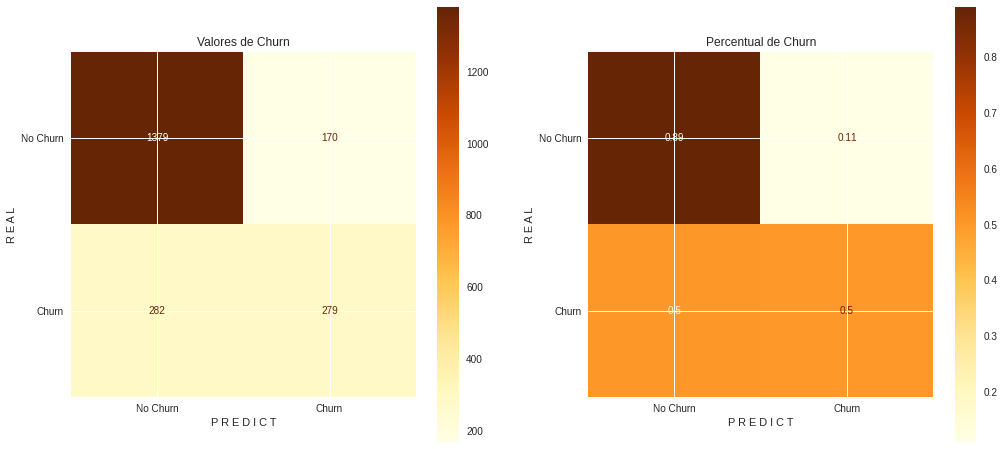

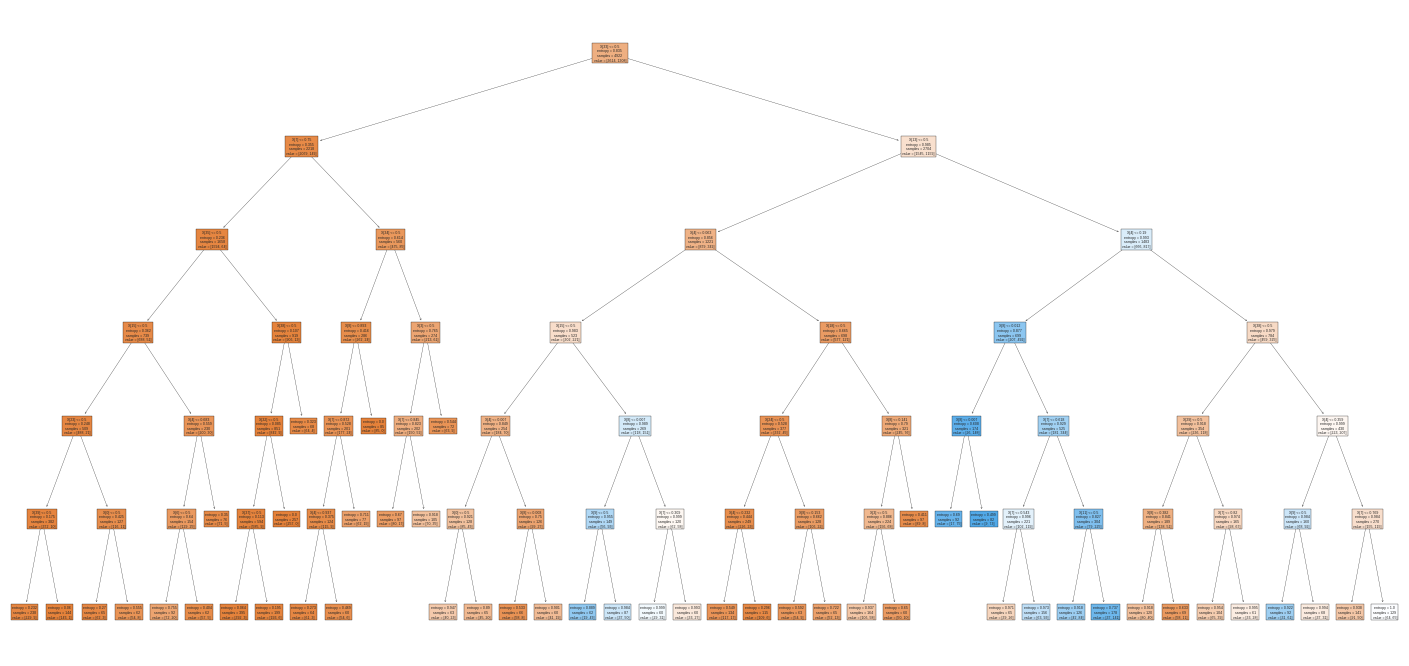

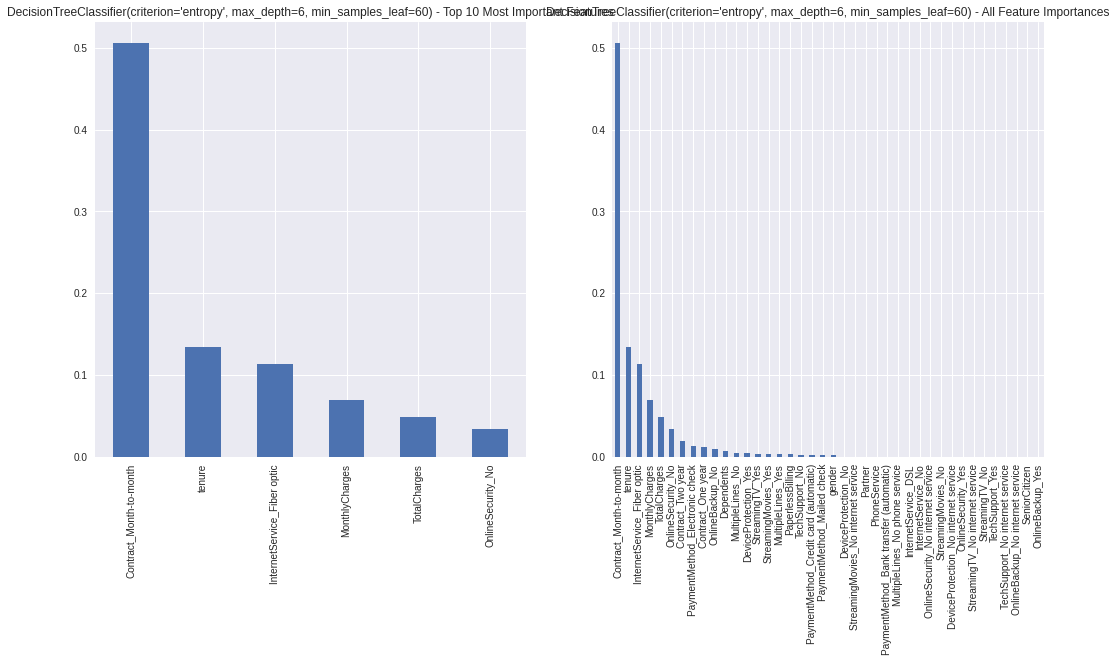

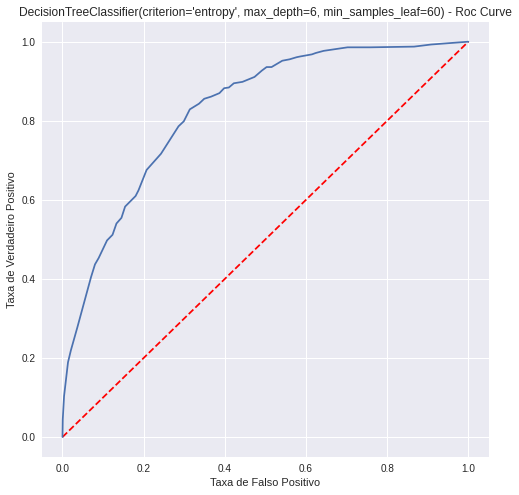

AUC Score (ROC): 0.8265323266462522



In [ ]:
# Salvando um modelo com os melhores parâmetros e rodando todo pipeline novamente para avaliar resultados da otimização

best_tree = tree_grid.best_estimator_

pipeline(df, 'Churn', best_tree, 0.3)

####Resultado da otimização dos hiper-parâmetros com Grid Search CV

  * A sensibilidade (previsão de verdadeiros positivos) passou de 23% para 19% após a otimização
  * A especificidade (previsão de verdadeiros negativos) passou de 76% para 79%

  * A especificidade é dada pela razão entre o número de verdadeiros negativos e a soma do número de verdadeiros negativos com o número de falsos positivos

  * A Sensibilidade é dada pela razão entre o número de verdadeiros positivos e a soma do número de verdadeiros positivos com o número de falsos negativos

  * AUC Score (ROC), passou de 0.821 para 0.826.

##**Aplicando Pipeline ao Modelo Random Forest**

Definindo Target
Dividindo a base de Treino e Teste
Aplicando o Modelo
Avaliando o Resultado
 Acurácia da Amostra de Teste: 77.53554502369668

 Score Amostra de Treino (comparativo): 0.9987809833401057

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1549
           1       0.60      0.46      0.52       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


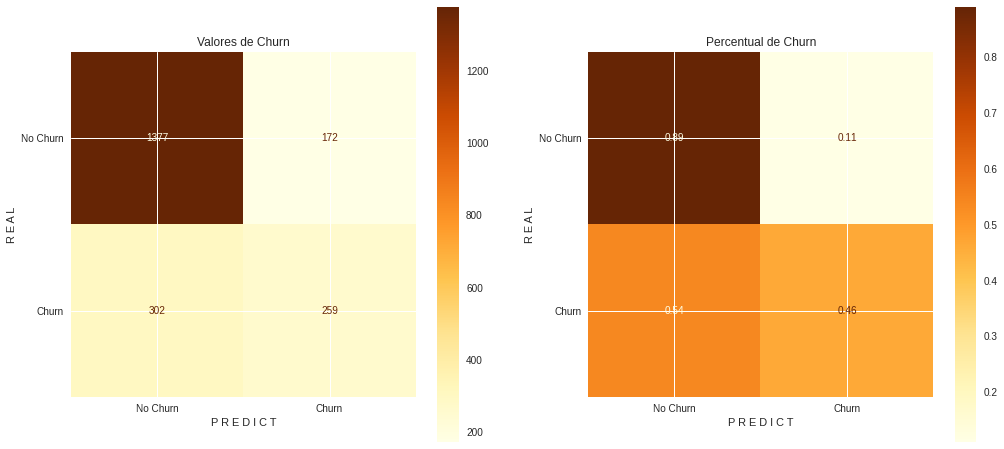

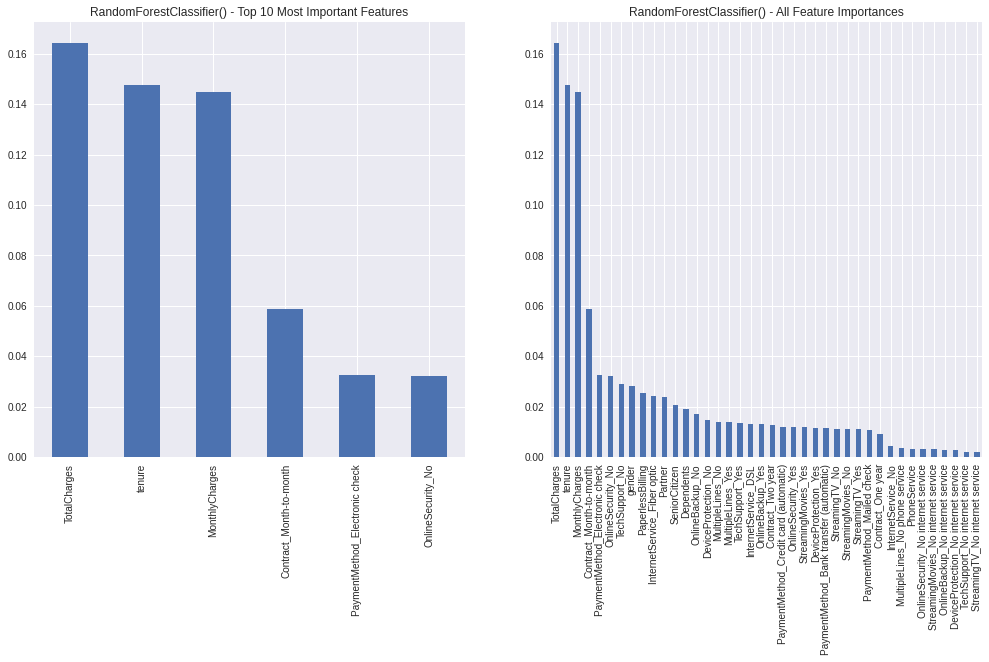

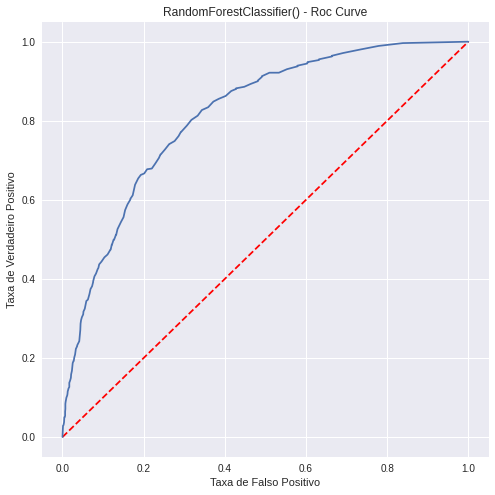

AUC Score (ROC): 0.8144660058988089



In [ ]:
# Aplicando pipeline ao modelo Random Forest

pipeline(df, 'Churn', r_forest, 0.3)

####Otimização com Grid Search CV

In [ ]:
# Otimizando o resultado através do uso de Grid Search CV

rf_parameter = {'criterion': ['gini', 'entropy'],
              'max_depth': [ 6, 7, 8, 9, 10],
              'min_samples_leaf': [10, 15, 20],
              'min_samples_split': [40, 50, 75, 100],
              'n_estimators' : [30, 40, 50, 60]            
              }

rf_grid = GridSearchCV(estimator=r_forest, param_grid=rf_parameter, cv=10, scoring='accuracy').fit(x_train, y_train)

print(f"Score Médio Treino: {rf_grid.score(x_train, y_train).mean()}\n")
print(f"Score Médio Teste: {rf_grid.score(x_test, y_test).mean()}\n")

print(f"O melhor parâmetro entre todos para estimar y_predict:\n{rf_grid.best_estimator_}\n")
print(f"O maior Score entre todos os parâmetros testados:\n{rf_grid.best_score_}\n")
print(f"A melhor combinação de parâmetros:\n{rf_grid.best_params_}\n")

Score Médio Treino: 0.8169443315725315

Score Médio Teste: 0.7914691943127962

O melhor parâmetro entre todos para estimar y_predict:
RandomForestClassifier(max_depth=7, min_samples_leaf=15, min_samples_split=50,
                       n_estimators=40)

O maior Score entre todos os parâmetros testados:
0.8086186282755323

A melhor combinação de parâmetros:
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 15, 'min_samples_split': 50, 'n_estimators': 40}



Definindo Target
Dividindo a base de Treino e Teste
Aplicando o Modelo
Avaliando o Resultado
 Acurácia da Amostra de Teste: 78.67298578199052

 Score Amostra de Treino (comparativo): 0.8169443315725315

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1549
           1       0.64      0.46      0.53       561

    accuracy                           0.79      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.79      0.77      2110



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


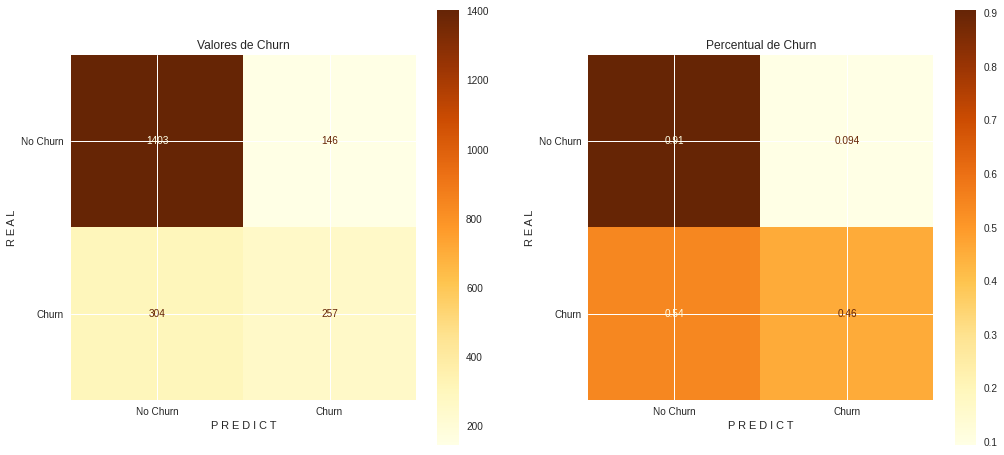

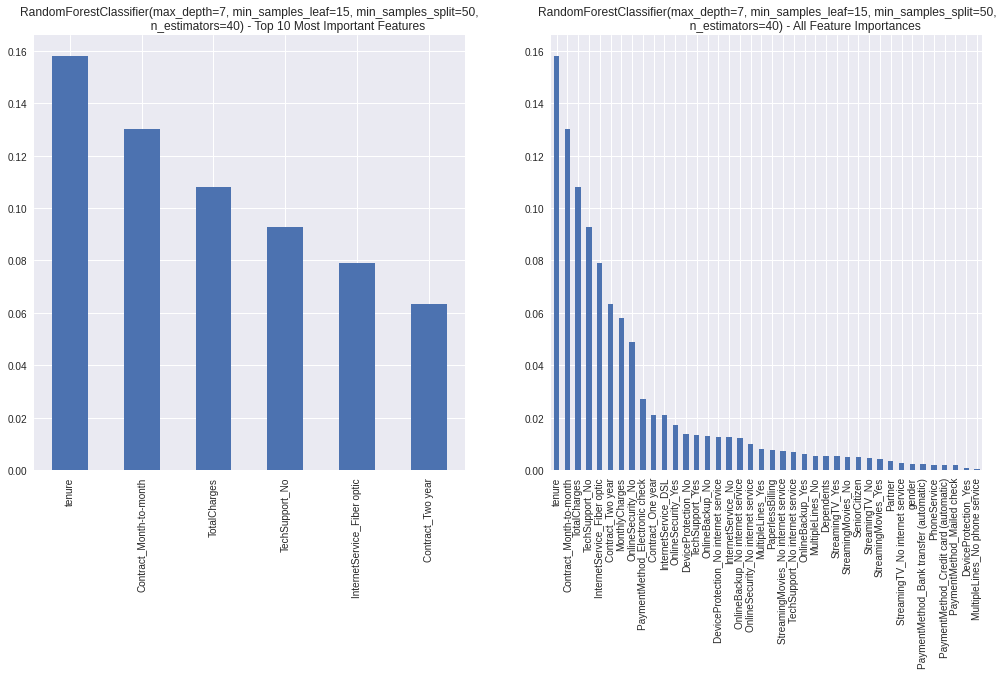

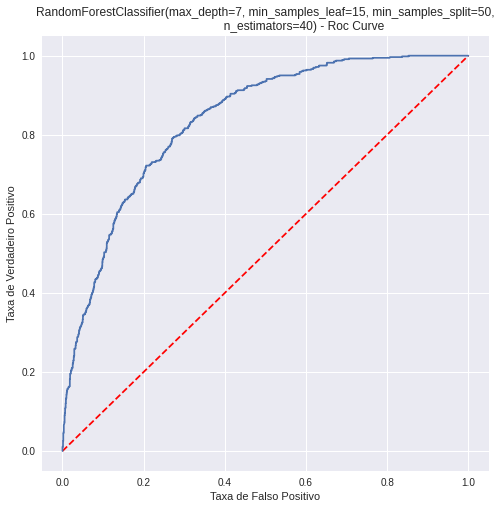

AUC Score (ROC): 0.8369357955048914



In [ ]:
# Salvando um modelo com os melhores parâmetros e rodando todo pipeline novamente para avaliar resultados da otimização

best_rf = rf_grid.best_estimator_

pipeline(df, 'Churn', best_rf, 0.3)

  * **Verdadeiros Positivos** - indica corretamente que determinado elemento pertence a uma classe classe

  * **Verdadeiros Negativos** - Indica corretamente que determinado elemento não pertence a uma classe classe

  * **Falsos Positivos** - Erra ao indicar que determinado elemento pertence a uma classe

  * **Falsos Negativos** - Erra ao indicar que determinado elemento não pertence a uma classe



##**Aplicando Pipeline ao Modelo AdaBoost**

Definindo Target
Dividindo a base de Treino e Teste
Aplicando o Modelo
Avaliando o Resultado
 Acurácia da Amostra de Teste: 79.19431279620854

 Score Amostra de Treino (comparativo): 0.8136936204794799

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.72      2110
weighted avg       0.78      0.79      0.78      2110



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


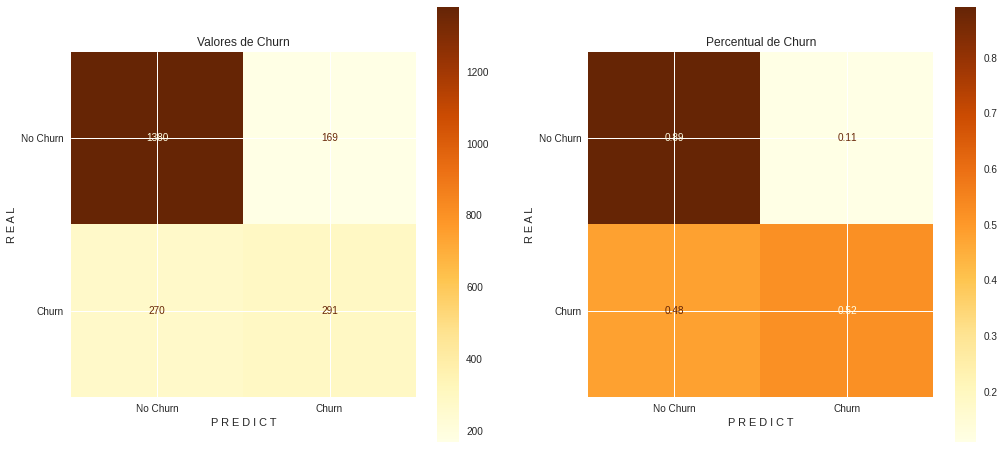

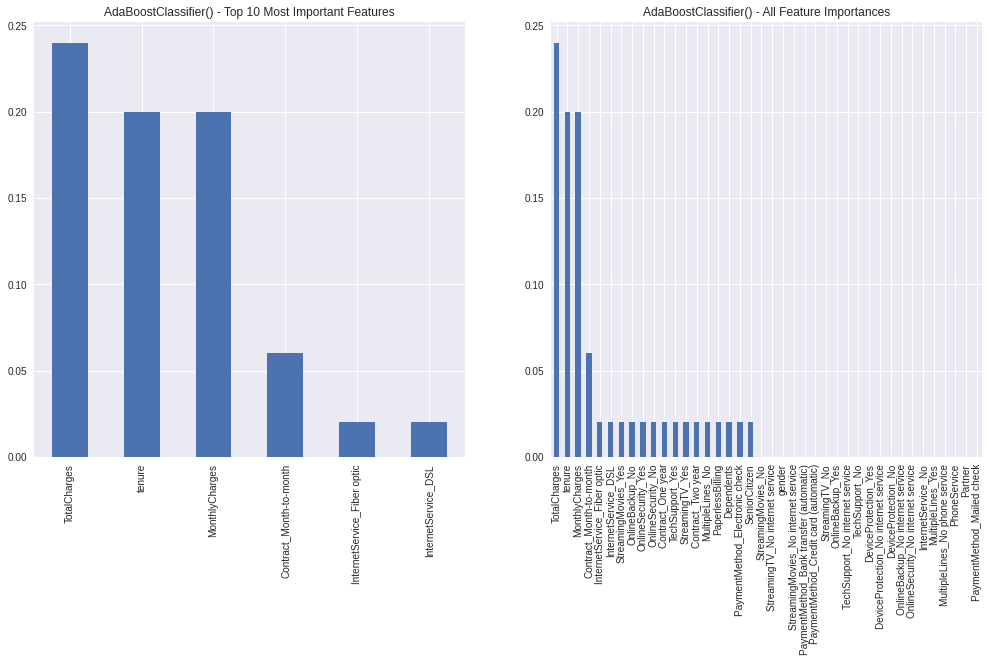

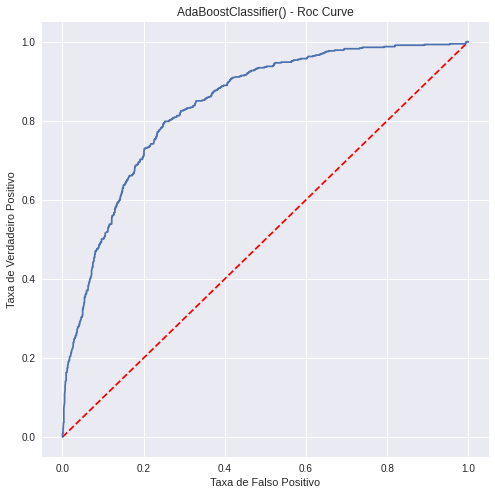

AUC Score (ROC): 0.8382407602397729



In [ ]:
# Aplicando pipeline ao modelo Ada Boost

pipeline(df, 'Churn', adaboost, 0.3)

####Otimização com Grid Search CV

In [ ]:
# Otimizando o resultado através do uso de Grid Search CV

ada_parameter = {'n_estimators': [10, 11, 12, 20, 25, 30],
             'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
             'algorithm': ['SAMME', 'SAMME.R']
                }           

ada_grid = GridSearchCV(estimator=adaboost, param_grid=ada_parameter, cv=10, scoring='accuracy').fit(x_train, y_train)

print(f"Score Médio Treino: {ada_grid.score(x_train, y_train)}\n")
print(f"Score Médio Teste: {ada_grid.score(x_test, y_test)}\n")

print(f"O melhor parâmetro entre todos para estimar y_predict:\n{ada_grid.best_estimator_}\n")
print(f"O maior Score entre todos os parâmetros testados:\n{ada_grid.best_score_}\n")
print(f"A melhor combinação de parâmetros:\n{ada_grid.best_params_}\n")

Score Médio Treino: 0.8114587566030069

Score Médio Teste: 0.7938388625592417

O melhor parâmetro entre todos para estimar y_predict:
AdaBoostClassifier(n_estimators=30)

O maior Score entre todos os parâmetros testados:
0.8067910090865615

A melhor combinação de parâmetros:
{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 30}



Definindo Target
Dividindo a base de Treino e Teste
Aplicando o Modelo
Avaliando o Resultado
 Acurácia da Amostra de Teste: 79.38388625592417

 Score Amostra de Treino (comparativo): 0.8114587566030069

              precision    recall  f1-score   support

           0       0.84      0.90      0.86      1549
           1       0.64      0.51      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.78      0.79      0.79      2110



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


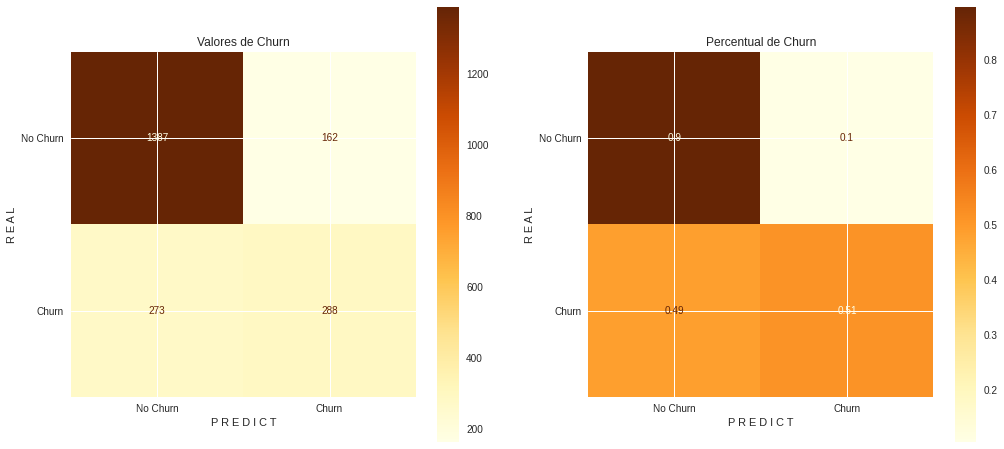

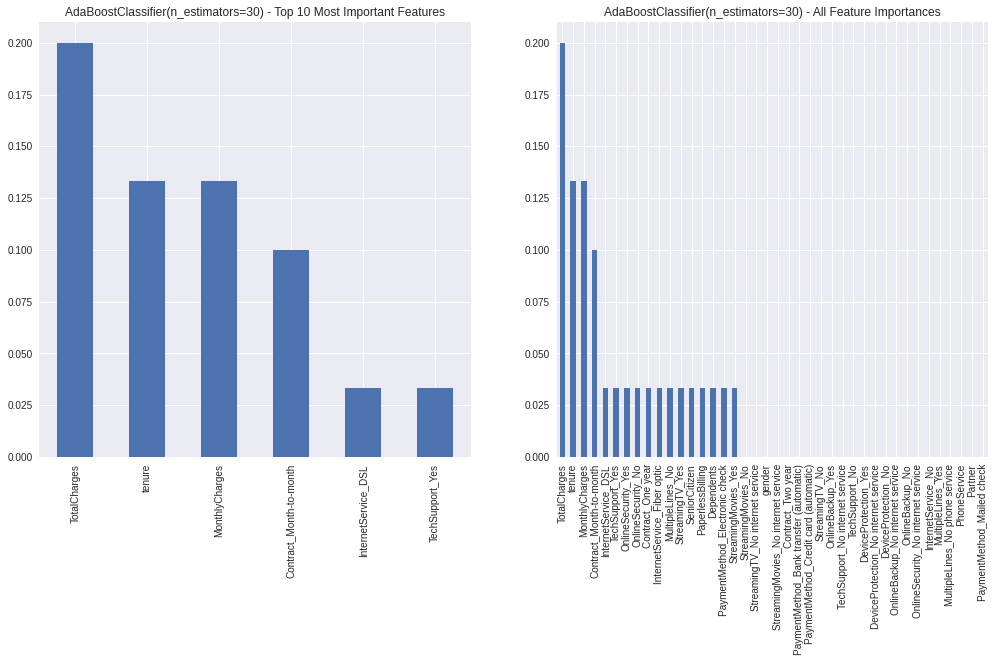

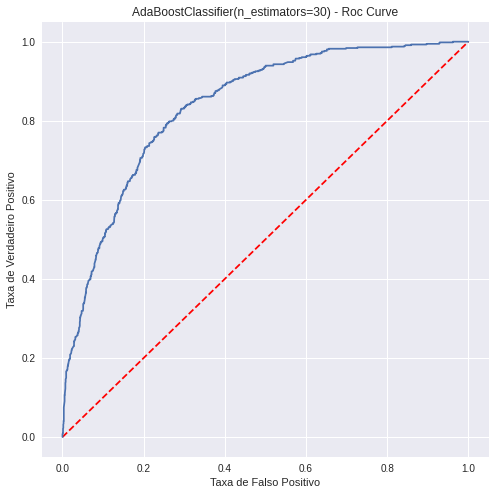

AUC Score (ROC): 0.8378995591428661



In [ ]:
# Salvando um modelo com os melhores parâmetros e rodando todo pipeline novamente para avaliar resultados da otimização

best_ada = ada_grid.best_estimator_

pipeline(df, 'Churn', best_ada, 0.3)

##**Conclusão**

In [ ]:
# Juntando tudo em um quadro comparativo

models_tested = [tree,best_tree, r_forest,  best_rf, adaboost, best_ada]

for m in models_tested:
  y_pred = m.predict(x_test)
  y_hat_prob = m.predict_proba(x_test)[:,1]
  
  print(f"Performance do modelo {m} de acordo com Accuracy Score:\n {accuracy_score(y_test, y_pred) * 100}")
  print(f"Performance do modelo {m} de acordo com ROC Auc Curve:\n {roc_auc_score(y_test, y_hat_prob)}\n")
  print(classification_report(y_test, y_pred))
 

Performance do modelo DecisionTreeClassifier(max_depth=5) de acordo com Accuracy Score:
 78.81516587677724
Performance do modelo DecisionTreeClassifier(max_depth=5) de acordo com ROC Auc Curve:
 0.8219620731677847

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.51      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

Performance do modelo DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=60) de acordo com Accuracy Score:
 78.5781990521327
Performance do modelo DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=60) de acordo com ROC Auc Curve:
 0.8265323266462522

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.50      0.55       5

###Afinal, Qual Modelo Performou Melhor?

  * **Decision Tree Classifier** - O modelo Decision Tree aplicado diretamente (sem indicação de hiper-parâetros) atingiu uma Acurácia de 0.788 e um valor de 0.821 para ROC Auc Score

  Após a **otimização** com Grid Search, o modelo passou a ter uma Acurácia de 0.785 e um ROC Auc Score de 0.826

  * **Random Forest Classifier** - O modelo Random Forest aplicado inicialmente apresentou uma Acurácia de 0.775 e um ROC Auc Curve de 0.814

  Após a otimização com Grid Search, o modelo passou a ter uma Acurácia de 0.786 e um ROC Auc Score de 0.836

  * ** Ada Boost Classifier** - O modelo Ada Boost aplicado sem hiper-parâmetros apresentou uma acurácia de 0.791 e um ROC Auc Curve de 0.838

  Após a otimização com Grid Search, o modelo passou a ter uma Acurácia de 0.793 e um ROC Auc Score de 0.837

  A otimização dos modelos conseguiu elevar um pouco a performance dos modelos avaliados, mas não houve uma melhora significativa, apenas alguns décimos a mais.

  O modelo que melhor performou entre todos os avaliados foi o Ada Boost Classifier, utilizando os hiper-parâmetros encontrados através do Grid Search CV.

####**ADA BOOST CLASSIFIER**
É um modelo de árvores adaptivo, onde a saída de uma árvore serve de base para a próxima e assim sucessivamente, em série.
O modelo aumenta a sua eficácia ao "aprender" com os erros das árvores de classificação anteriores.

Este modelo de classificação com Ada Boost é o mais adequado entre os modelos testados para prever Churn. Ele acerta 90% dos casos de verdadeiros negativos e erra 10% de casos de falsos positivos. Ao mesmo tempo ele acerta 51% dos casos de verdadeiros positivos e erra 49% dos casos de falsos negativos.
